In [6]:
# Telework and Job Satisfaction in Europe, 2015–2024
# Analysis Notebook

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [7]:
tele = pd.read_csv("../data/processed/lfsa_ehomp_2015_2024_clean.csv")
sat1 = pd.read_csv("../data/processed/lfso_21jsat01_2015_2024_clean.csv")
sat4 = pd.read_csv("../data/processed/lfso_21jsat04_2021_clean.csv")


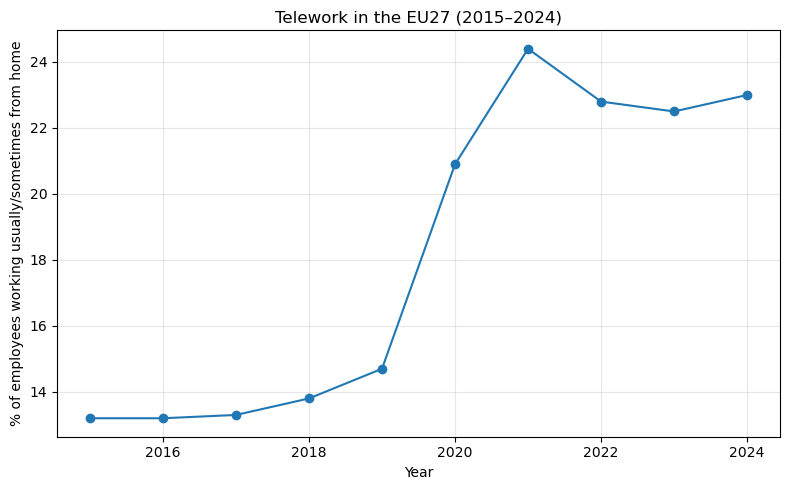

In [8]:
# EU27_2020 series
eu27 = tele[tele["geo"]=="EU27_2020"].copy()

plt.figure(figsize=(8,5))
plt.plot(eu27["time"], eu27["telework_any"], marker="o")
plt.title("Telework in the EU27 (2015–2024)")
plt.xlabel("Year")
plt.ylabel("% of employees working usually/sometimes from home")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [4]:
tele2021 = tele[tele["time"]==2021].copy()

dfm = tele2021.merge(sat1, on=["geo","time"], how="inner")
dfm = dfm.merge(sat4, on=["geo","time"], how="inner")

dfm = dfm.rename(columns={
    "telework_any":"telework_2021",
    "share_high":"share_high_jsat01",        # baseline job satisfaction
    "share_in_group":"share_high_jsat04"     # satisfaction × WFH × flexibility
})

print("Merged countries:", len(dfm))
display(dfm.head())

# Correlations
print("Correlation telework vs jsat01:", dfm[["telework_2021","share_high_jsat01"]].corr().iloc[0,1])
print("Correlation telework vs jsat04:", dfm[["telework_2021","share_high_jsat04"]].corr().iloc[0,1])


Merged countries: 31


,geo,time,SMT,USU,telework_2021,share_high_jsat01,share_high_jsat04
0,AT,2021,12.8,16.2,29.0,0.089542,0.290471
1,BE,2021,13.8,26.4,40.2,0.085934,0.287595
2,BG,2021,3.7,2.8,6.5,0.048013,0.209383
3,CH,2021,27.4,16.6,44.0,0.104222,0.362979
4,CY,2021,6.2,6.9,13.1,0.103489,0.350191


Correlation telework vs jsat01: 0.013098829053630606
Correlation telework vs jsat04: -0.0971841448568154


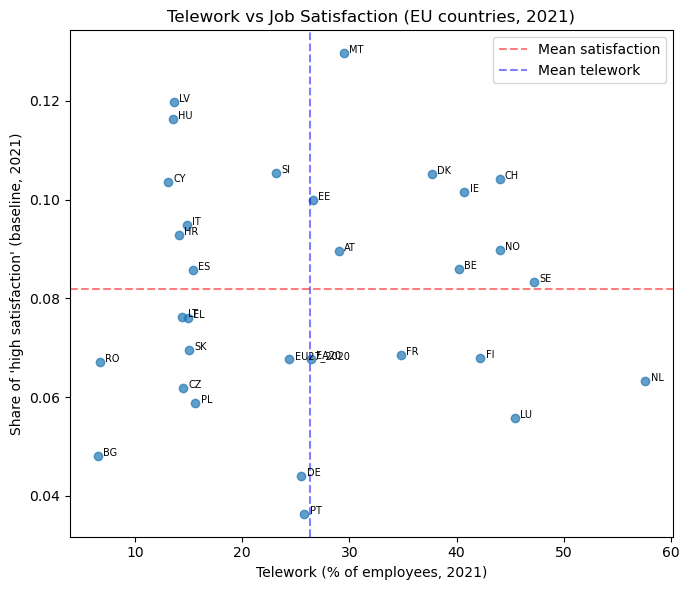

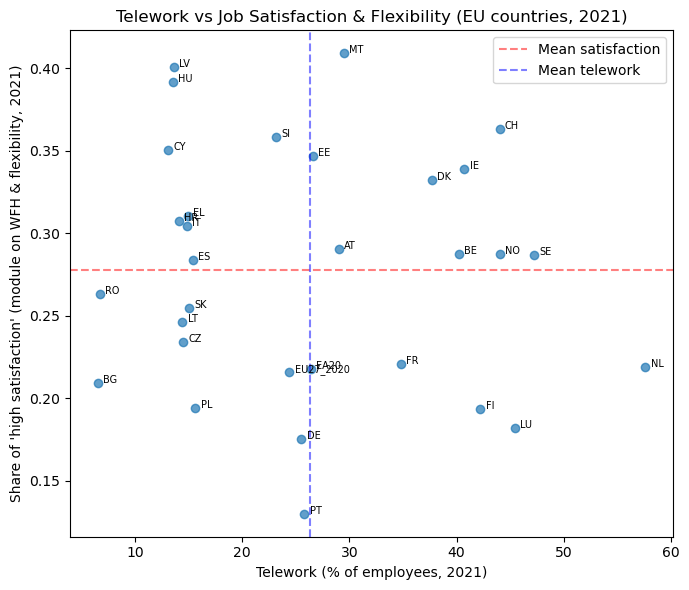

In [5]:
# Telework vs baseline satisfaction (jsat01)
plt.figure(figsize=(7,6))
plt.scatter(dfm["telework_2021"], dfm["share_high_jsat01"], alpha=0.7)

for i,row in dfm.iterrows():
    plt.text(row["telework_2021"]+0.5, row["share_high_jsat01"], row["geo"], fontsize=7)

plt.xlabel("Telework (% of employees, 2021)")
plt.ylabel("Share of 'high satisfaction' (baseline, 2021)")
plt.title("Telework vs Job Satisfaction (EU countries, 2021)")
plt.axhline(dfm["share_high_jsat01"].mean(), color="red", linestyle="--", alpha=0.5, label="Mean satisfaction")
plt.axvline(dfm["telework_2021"].mean(), color="blue", linestyle="--", alpha=0.5, label="Mean telework")
plt.legend()
plt.tight_layout()
plt.show()

# Telework vs satisfaction × WFH × flexibility (jsat04)
plt.figure(figsize=(7,6))
plt.scatter(dfm["telework_2021"], dfm["share_high_jsat04"], alpha=0.7)

for i,row in dfm.iterrows():
    plt.text(row["telework_2021"]+0.5, row["share_high_jsat04"], row["geo"], fontsize=7)

plt.xlabel("Telework (% of employees, 2021)")
plt.ylabel("Share of 'high satisfaction' (module on WFH & flexibility, 2021)")
plt.title("Telework vs Job Satisfaction & Flexibility (EU countries, 2021)")
plt.axhline(dfm["share_high_jsat04"].mean(), color="red", linestyle="--", alpha=0.5, label="Mean satisfaction")
plt.axvline(dfm["telework_2021"].mean(), color="blue", linestyle="--", alpha=0.5, label="Mean telework")
plt.legend()
plt.tight_layout()
plt.show()


## Conclusions

- **Telework**: sharply increased in 2020 across the EU27, with levels remaining high in 2021–2024 compared to the pre-pandemic period.
- **Job satisfaction**: according to the 2021 ad-hoc module, there is **no clear correlation** between the prevalence of telework and the share of employees reporting high job satisfaction across EU countries.
- **Implication**: While telework transformed work organisation, the expected positive link with job satisfaction is not supported by EU-LFS data for 2021.
- **Limitation**: Job satisfaction data are only available for 2021; no time series is possible. Further research would need microdata access or alternative surveys (e.g., EU-SILC, Eurofound).
